In [2]:
import torch
torch.set_printoptions(precision=6)

# ---------- forward definition ----------
def forward(x, y):
    """
    z(x,y) = u(x,y)^2 * sqrt(v(x,y)) + tan(v(x,y))
    where  u = x^2 y + y^3
           v = exp(xy)
    """
    u = x**2 * y + y**3
    v = torch.exp(x * y)
    return u**2 * torch.sqrt(v) + torch.tan(v)

# ---------- your job: analytically derived gradients ----------
def grad_manual(x_val: float, y_val: float):
    """
    Return (dz/dx, dz/dy) evaluated at the numerical inputs.
    Replace the `...` with your expressions in pure Python / PyTorch math!
    """
    x = torch.tensor(x_val)
    y = torch.tensor(y_val)

    # inner functions
    u = x**2 * y + y**3
    v = torch.exp(x * y)
    sqrt_v   = torch.sqrt(v)
    inv_sqrt = 1.0 / sqrt_v
    sec2_v   = 1.0 / torch.cos(v)**2

    # ---- YOUR FORMULAS HERE ----
    dz_dx = 2 * u * sqrt_v * (2 * x * y)   +   (0.5 * u**2 * inv_sqrt + sec2_v) * (y * v)
    dz_dy = 2 * u * sqrt_v * (x**2 + 3 * y**2) + (0.5 * u**2 * inv_sqrt + sec2_v) * (x * v)
    # -------------------------------------

    return float(dz_dx), float(dz_dy)

# ---------- autograd reference ----------
def grad_autograd(x_val: float, y_val: float):
    x = torch.tensor(x_val, requires_grad=True)
    y = torch.tensor(y_val, requires_grad=True)
    z = forward(x, y)
    z.backward()
    return float(x.grad), float(y.grad)

# ---------- quick test ----------
if __name__ == "__main__":
    for (xv, yv) in [(1.0, 2.0), (0.3, -1.2), (2.0, 0.5)]:
        g_man = grad_manual(xv, yv)
        g_auto = grad_autograd(xv, yv)
        ok = all(abs(a-b) < 1e-5 for a,b in zip(g_man, g_auto))
        status = "✔️  Match!" if ok else "❌  Mismatch!"
        print(f"(x={xv:4.1f}, y={yv:4.1f})  manual {g_man}   autograd {g_auto}   {status}")


(x= 1.0, y= 2.0)  manual (562.80517578125, 879.424560546875)   autograd (562.80517578125, 879.4246215820312)   ❌  Mismatch!
(x= 0.3, y=-1.2)  manual (-0.9066379070281982, -12.74722671508789)   autograd (-0.9066379070281982, -12.74722671508789)   ✔️  Match!
(x= 2.0, y= 0.5)  manual (17.510421752929688, 47.26872634887695)   autograd (17.510421752929688, 47.26872634887695)   ✔️  Match!


epoch 00 | loss 6.0821 | w 1.490 | b 2.010
epoch 01 | loss 0.8972 | w 2.034 | b 2.010
epoch 02 | loss 0.4086 | w 2.389 | b 2.010
epoch 03 | loss 0.2002 | w 2.621 | b 2.010
epoch 04 | loss 0.1113 | w 2.772 | b 2.010
epoch 05 | loss 0.0734 | w 2.871 | b 2.010
epoch 06 | loss 0.0572 | w 2.936 | b 2.010
epoch 07 | loss 0.0503 | w 2.978 | b 2.010
epoch 08 | loss 0.0474 | w 3.006 | b 2.010
epoch 09 | loss 0.0461 | w 3.023 | b 2.010
epoch 10 | loss 0.0456 | w 3.035 | b 2.010
epoch 11 | loss 0.0454 | w 3.043 | b 2.010
epoch 12 | loss 0.0453 | w 3.048 | b 2.010
epoch 13 | loss 0.0452 | w 3.051 | b 2.010
epoch 14 | loss 0.0452 | w 3.053 | b 2.010
epoch 15 | loss 0.0452 | w 3.055 | b 2.010
epoch 16 | loss 0.0452 | w 3.056 | b 2.010
epoch 17 | loss 0.0452 | w 3.056 | b 2.010
epoch 18 | loss 0.0452 | w 3.057 | b 2.010
epoch 19 | loss 0.0452 | w 3.057 | b 2.010
epoch 20 | loss 0.0452 | w 3.057 | b 2.010
epoch 21 | loss 0.0452 | w 3.057 | b 2.010
epoch 22 | loss 0.0452 | w 3.057 | b 2.010
epoch 23 | 

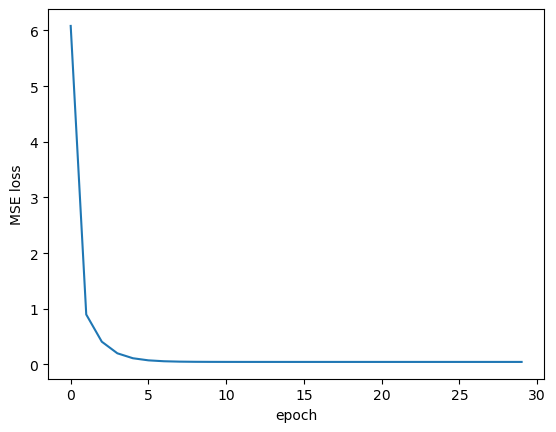

In [3]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(0)

# ---------- synthetic data ----------
true_w, true_b = 3.0, 2.0
X = torch.linspace(-1, 1, 50).unsqueeze(1)          # shape (50,1)
y = true_w * X + true_b + 0.2 * torch.randn_like(X) # add noise

# ---------- model params (to learn) ----------
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# ---------- hyper-parameters ----------
lr = 0.5
epochs = 30
loss_trace = []

# ---------- training loop ----------
for epoch in range(epochs):
    # forward pass  -----------------------------
    # TODO: compute predictions 'pred'
    pred = w * X + b
    # TODO: meanw-squared-error loss
    loss = torch.mean((pred - y) ** 2)

    # backward pass ----------------------------
    loss.backward()

    # manual gradient step ---------------------
    with torch.no_grad():
        # TODO: update w and b using lr and their .grad values
        w -= lr * w.grad
        b -= lr * b.grad

        # zero the gradients for next iter
        w.grad.zero_()
        b.grad.zero_()

    loss_trace.append(loss.item())
    print(f"epoch {epoch:02d} | loss {loss.item():.4f} | w {w.item():.3f} | b {b.item():.3f}")

# ---------- visualize loss curve ----------
plt.plot(loss_trace)
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.show()
